In [ ]:
import zarr 
import numpy as np
import imageio
import os



In [29]:
#Getting List of Image File Names
path = "/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/"
tiff_files = sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith('.tiff') or f.endswith('.tif')])
len (tiff_files)

test_image = imageio.imread (tiff_files[0])
print (test_image.shape)
print (tiff_files[0])

(1818, 2425)
/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/FTL_AD_NA19-386_XY01.tif


/tmp/ipykernel_399565/464871638.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_image = imageio.imread (tiff_files[0])
/home/S-DM/conda/envs/masketeers/lib/python3.11/site-packages/imageio/plugins/_tifffile.py:3344: UserWarning: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
  warnings.warn(str(e))


In [30]:
# Sorting files into conditions
conditions = ["AD", "CBD", "PiD", "PSP"]

condition_files = {}

for condition in conditions:
    condition_files[condition] = [f for f in tiff_files if condition in f]

print (condition_files["AD"])







['/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/FTL_AD_NA19-386_XY01.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/FTL_AD_NA22-214_XY01.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/FTL_AD_NA22-225_XY02.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/GSK3a_AD_NA19-286_XY01.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/GSK3a_AD_NA19-286_XY02.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/GSK3a_AD_NA22-214_XY01.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/GSK3a_AD_NA22-225_XY05.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/LAMP2_AD_NA19-286_XY03.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/LAMP2_AD_NA22-214_XY01.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/LAMP2_AD_NA22-214_XY02.tif', '/mnt/efs/aimbl_2025/student_data/S-DM/Data/raw_1_channel_images/

In [34]:
segmentation_path = "/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/"
seg_folders = sorted(os.listdir (segmentation_path))
n_channels = len (seg_folders)
print (n_channels)
# segmentations = []
# for files in tiff_files:
#     image_name = files.split ("/")[-1]
#     image = imageio.imread (files)
#     image_shape = image.shape
#     #print (image_shape)
#     channels = []
#     for ch in seg_folders:
#         channel_path = os.path.join (segmentation_path, ch, image_name)
#         #print (channel_path)
#         if os.path.exists (channel_path):
#             channel = imageio.imread (channel_path)
#             #print (channel, channel.shape)
#             channels.append (channel)
#         else:
#             zero_array = np.zeros (shape = image_shape)
#             channels.append (zero_array)
#     #channels = np.stack (channels)
#     segmentations.append (channels)
# print (segmentations)


        


11


In [36]:
print ((n_channels,) + test_image.shape)

(11, 1818, 2425)


In [54]:
test_zarr = "test.zarr"

root = zarr.open(test_zarr, mode='w')
for condition, file_list in condition_files.items():
    # Create a group for each condition
    group = root.create_group(condition)
    # Loop through each image file in the list
    for fname in file_list:
        # Load the image as a NumPy array
        img = imageio.imread(fname)
        image_name = fname.split ("/")[-1]
        
        image_shape = img.shape
        segment_shape = ((n_channels,) +image_shape)

        

        # Create an image group inside the condition group
        group_fov = group.create_group(image_name)
        #Create an array for image
        group_fov.create_array(name = "x", data = img)
        group_fov.create_array (name = "y", data = np.zeros(segment_shape))
        for i in range (0, n_channels):
            channel_path = os.path.join (segmentation_path, seg_folders[i], image_name)
            print (channel_path)
            if os.path.exists (channel_path):
                group_fov["y"][i, :, :] = imageio.imread (channel_path)
        
        

/tmp/ipykernel_399565/2762042662.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(fname)
/home/S-DM/conda/envs/masketeers/lib/python3.11/site-packages/imageio/plugins/_tifffile.py:3344: UserWarning: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
  warnings.warn(str(e))


/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/ap/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/cb/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/glo/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/gt/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/nft/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/np/FTL_AD_NA19-386_XY01.tif


/tmp/ipykernel_399565/2762042662.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  group_fov["y"][i, :, :] = imageio.imread (channel_path)


/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/pb/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/spl/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/ta/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/tanc/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/threads/FTL_AD_NA19-386_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/ap/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/cb/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/glo/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/gt/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/nft/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/np/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data/classes/pb/FTL_AD_NA22-214_XY01.tif
/mnt/efs/aimbl_2025/student_data/S-DM/Data

In [71]:

list(root.keys())
ad_files = list (root ["CBD"].keys())
print (ad_files)
# print (root ["AD"][ad_files[0]]["y"].shape[1:])
for files in ad_files:
    x = root["CBD"][files]["x"]
    y = root["CBD"][files]["y"]
    if x.shape == y.shape [1:]:
        print ("Shapes of X and Y in {files} match")
    else:
        print("Shapes of X and Y in {files} do not match")



['LAMP2_CBD_NA22-198_XY02.tif', 'VGF_CBD_NA22-198_XY02.tif', 'LAMP2_CBD_NA22-093_XY01.tif', 'GSK3a_CBD_NA22-198_XY03_stitched_overlay.tif', 'LAMP2_CBD_NA22-093_XY02.tif', 'FTL_CBD_NA15-124_XY02.tif', 'VGF_CBD_NA22-093_XY02.tif', 'LAMP2_CBD_NA22-298_XY06.tif', 'GSK3a_CBD_NA15-124_XY01_stitched_overlay.tif', 'VPS35_CBD_NA22-093_XY01.tif', 'VGF_CBD_NA15-124_XY05.tif', 'LAMP2_CBD_NA22-198_XY01.tif', 'GSK3A_CBD_NA22-093_XY01_stitched_overlay.tif', 'VPS35_CBD_NA15-124_XY01.tif', 'FTL_CBD_NA22-093_XY01.tif', 'FTL_CBD_NA22-298_XY01.tif', 'VPS35_CBD_NA22-198_XY01.tif']
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X and Y in {files} match
Shapes of X a

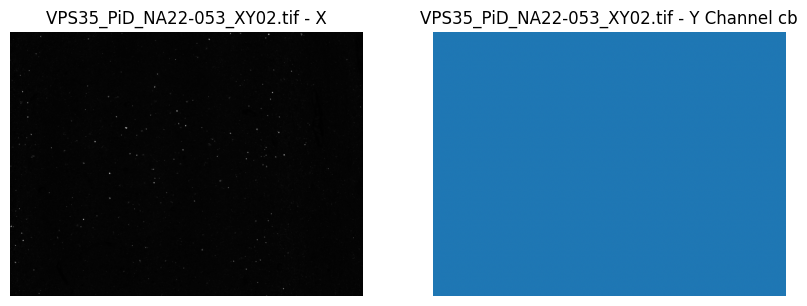

In [78]:
import random
import matplotlib.pyplot as plt

    # Randomly pick a condition
condition = random.choice(conditions)
condition_group = root[condition]
    
    # Randomly pick an image
image_name = random.choice(list(condition_group.keys()))
image_group = condition_group[image_name]
    
    # Access x and y arrays
x = image_group["x"][:]      # Load x (H, W)
y = image_group["y"][:]      # Load y (C, H, W) or (H, W, C)
index = random.choice (range (0,11))
y = y[index, :, :]
    
    
    
    # Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x, cmap="gray")
axes[0].set_title(f"{image_name} - X")
axes[0].axis("off")
    
axes[1].imshow(y, cmap="tab20")
axes[1].set_title(f"{image_name} - Y Channel {seg_folders[index]}")
axes[1].axis("off")
    
plt.show()